Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Nipun Waas"

---

# Multimodal Data Fusion - Exercise 4 - Bayesian Inference and Parameter Estimation


In this exercise, we will take a closer look at the Bayesian framework and the basics of Bayesian inference to be needed in data fusion systems. You will be learning about prior likelihood, posterior, probabilistic models, and Bayes rule as well as applying these to parameter estimation with linear regression w/o outliers.

## Learning goals 

After completion of this exercise, you should be able to

- Understand the basic elements of Bayesian inference
- Be able to apply traditional and Bayesian methods in simple parameter estimation tasks (i.e. curve fitting)
- Apply outlier robust methods to simple parameter estimation problems
- Apply Gaussian mixure model for clustering problems
  

## Relevant lecture
Lecture 5.

## Relevant Sections in course book

Chapter 9-11

## Additional Material
* Visualization and plotting with [matplotlib](https://matplotlib.org)
* Scikit-learn page on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
    * Linear Regression model [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    * Bayesian Ridge model [BayesianRidge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)
    * RANSAC (RANdom SAmple Consensus) algorithm [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)
* Scikit-learn page on [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* Scikit-learn page on [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)


# Bayesian Inference - Parameter estimation: curve fitting

<a id='KmeansDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Generate sinusoidal data with noise and bias

The code below defines a function for generating sinusoidal data with noise and generate random data points for x-axis and y-axis. Complete and run the code below to visualize the data.
<p>1) Define our sinusoidal function </p>
<p>2) Generate "size" number of uniform random data points in the range of 0. and 1. for x-axis </p>
<p>3) Generate "size" number of random data points from standard normal distribution for y-axis </p>
<p>4) Make a deep copy and add outlier bias to 5 samples </p>
<p>5) Define linearly spaced vector with 100 points in the range of 0. to 1. </p>
<p>6) Plot data point without and with outliers (vectors "x" and "y/y2") </p>


**Hint: Your output image should look like this**
<br>
<img src="images/Fig1.png" />
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

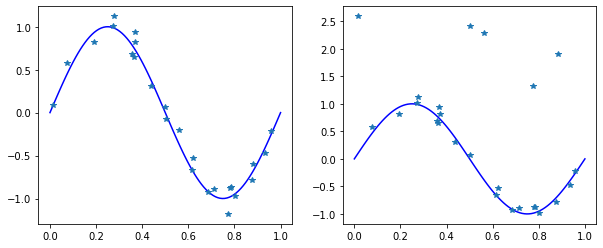

In [3]:
def func(x): return np.sin(2*np.pi*x)

size = 25

rng = np.random.RandomState(1234)
x = rng.uniform(0., 1., size)

y = rng.normal(scale=0.1, size=size)
y = func(x) + y

bias = 2.5
y2 = y.copy()
y2[15:20] = y2[15:20] + bias

xt = np.linspace(0., 1., 100)
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')

f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')

## Basics of robust estimation

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1

<p> Complete the code below to calculate sample mean, sample median, sample variance and mean absolute deviation of data without and with outliers (As in the lecture slides) </p>
    <p>1) Calculate the sample mean and sample median for the data without and with outliers </p>
    <p>2) Calculate the sample variance and mean absolute deviation for the data without and with outliers </p>
    <p>3) Document your observations and compare the impact of outliers to these measures.</p>

</div>

In [4]:
# Problem 1.1.
# Calculate sample mean

# YOUR CODE HERE
def calculate_mean(values):
    N = len(values)
    mean = np.divide(1, N) * np.sum(values) 
    return mean

y_mean = calculate_mean(y) 
y2_mean = calculate_mean(y2)

# Calculate sample median
def calculate_median(values):
    median = np.median(values)
    return median

y_median = calculate_median(y) 
y2_median = calculate_median(y2) 

# Problem 1.2.
# Calculate sample variance
def calculate_sample_variance(values):
    N = len(values)
    mean = calculate_mean(values)
    variance = np.divide(1, N-1) * np.sum(np.power((values - mean), 2))
    return variance

y_var = calculate_sample_variance(y) 
y2_var = calculate_sample_variance(y2)

# Calculate mean absolute deviation
def calculate_mean_absolute_deviation(values):
    N = len(values)
    mean = calculate_mean(values)
    mad = np.divide(1, N) * np.sum(np.sum(x - mean))
    return mad

y_mean_abs_dev = calculate_mean_absolute_deviation(y) 
y2_mean_abs_dev = calculate_mean_absolute_deviation(y2) 

print(f"y , y2 mean: {y_mean}, {y2_mean}")
print(f"y , y2 median: {y_median}, {y2_median}")
print(f"y , y2 variance: {y_var}, {y2_var}")
print(f"y , y2 MAD: {y_mean_abs_dev}, {y2_mean_abs_dev}")

y , y2 mean: -0.0874577096404818, 0.41254229035951817
y , y2 median: -0.2061900343242159, 0.5792076008271675
y , y2 variance: 0.5490633005206962, 1.2698896985898123
y , y2 MAD: 0.6361802142903488, 0.1361802142903487


#### 1.3 Document your observations and compare the impact of outliers to these statistical measures

Answer to 1.3 in here

Mean:
- Gets pulled towards extreme values when outliers are present.
- Mean in y2 shifts noticeably due to outliers from negative in y to positive in y2.

Median:
- The median is significantly affected by outliers as well, showing a notable change from y to y2. 

Variance:
- Variance increases in y2, indicating a higher spread of data. Outliers contribute to larger squared differences from the mean, making variance more susceptible to extreme values.

MAD:
- MAD remains relatively stable between y and y2. It is less affected by outliers, providing a more robust measure of how spread out the data is around the central tendency.

Conclusion:
- Both mean and median show significant changes in the presence of outliers, with the median reflecting a substantial shift.
- Variance is noticeably impacted by the outliers, leading to an increase in data spread.
- MAD demonstrates its resilience to outliers, offering a somewhat reliable measure of dispersion.

In [5]:
# Your points for the Problem 1.1 will be given in this cell. Do not modify it.

In [6]:
# Your points for the Problem 1.2 will be given in this cell. Do not modify it.

## Linear regression

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2

<p> Complete the code below to build and fit a linear regression model for curve fitting on sinusoidal data with noise. </p>
    
<p>1) Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())</p>
<p>2) Fit linear regression object with "X" and "y"</p>
<p>3) Print fitted linear regression model's coefficients</p>
<p>4) Predict the points using fitted linear regression model for "Xt"</p>
<p>5) Plot data points and obtained linear regression curve</p>

**Hint: Your output image should look like this**
<br>
<img src="images/Fig2.png" />
</div>

Coefficients: [  0.          12.00090089 -35.07074983  23.44153538]


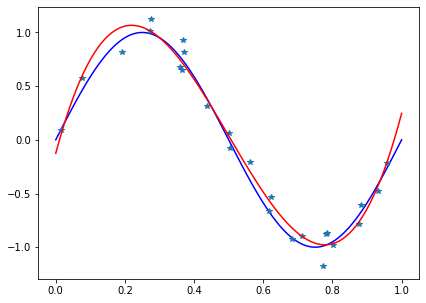

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## == Create linear regression object == ##
lreg = linear_model.LinearRegression()
n_order = 3

# YOUR CODE HERE
# Problem 2.1.
# Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())
X = PolynomialFeatures(n_order).fit_transform(x[:, np.newaxis])
Xt = PolynomialFeatures(n_order).fit_transform(xt[:, np.newaxis])

# Problem 2.2.
# Fit linear regression object with "X" and "y"
lreg.fit(X, y)

# Problem 2.3.
# Print fitted linear regression model's coefficients
coefficients = lreg.coef_
print('Coefficients:', coefficients)

# Problem 2.4. 
# Predict the points using fitted linear regression model for "Xt"
ypred = lreg.predict(Xt) 

# Problem 2.5.
# Plot data points and obtained linear regression curve
f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
# Your code here
plt.plot(x, y, '*') 

# Plot obtained linear regression curve with 'r'
# Your code here
plt.plot(xt, ypred, 'r')

In [8]:
# Your points for the Problem 2 coefficients implementation will be given in this cell. Do not modify it.

In [9]:
# Your points for the Problem 2 prediction will be given in this cell. Do not modify it.

## Bayesian linear regression

<a id='Task1.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3

<p> Complete the code below to build and fit a bayesian ridge regression model for curve fitting on sinusoidal data with noise.</p>
    
<p>1) Fit bayesian linear regression object with "X" and "y" and print coefficients</p>
<p>2) Predict the points using fitted bayesian linear regression model for "Xt" and also return the standard deviation</p>
<p>3) Plot data point and obtained bayesian linear regression curve. Also add the 95% prediction confidence interval with $\pm 1.96 \times ystd$</p>

**Hint: Your output image should look like this**
<br>
<img src="images/Fig3.png" />
<br>
    
<p>4) Repeat step 1 to 3 with new fitted bayesian linear regression model</p>
    
Note: Plot in red shaded are the 95% confidence interval corresponding to $\pm 1.96$ standard deviations above mean.


</div>

Coefficients: [ 0.83622239 -1.02159909 -1.09594268  0.13723005]


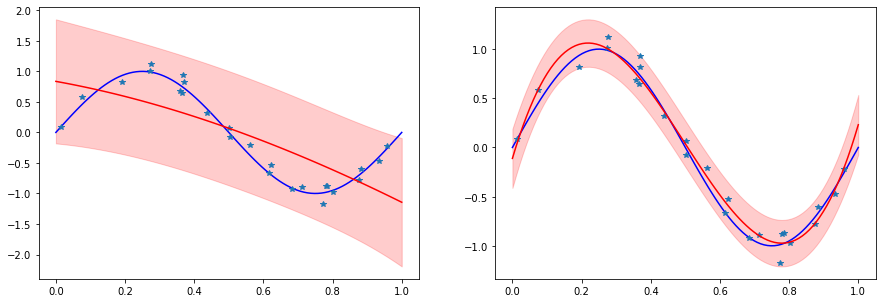

In [10]:
## == Create bayesian linear regression object == ##
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

# YOUR CODE HERE

# Problem 3.1.
# Fit bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X, y)

coefficient1 = breg.coef_
print('Coefficients:', coefficient1)

f = plt.figure(figsize=(15,5))

# Problem 3.2.
# Predict the points using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred1, ystd1 = breg.predict(Xt, return_std=True)

# Problem 3.3.
# Plot data point, obtained bayesian linear regression curve and 95% CI
# First subplot
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
# Your code here
plt.plot(x, y, '*')

# Plot obtained bayesian linear regression curve with 'r', also plot the 95% CI for predictions
# Your code here
plt.plot(xt, ypred1, 'r')
plt.fill_between(xt, ypred1 - 1.96 * ystd1, ypred1 + 1.96 * ystd1, color='red', alpha=0.2, label='95% CI')

# Set new parameters for the bayesian linear regression object
breg.set_params(alpha_init=1., lambda_init= 1e-3) 

# Updating the initial value for alpha (precision of the noise) and 
# initial value for lambda (precision of the weights)

# Problem 3.4.
# Perform the steps from 1 to 3 again with new fitted bayesian linear regression model

breg.fit(X, y)
coefficient2 = breg.coef_

ypred2, ystd2 = breg.predict(Xt, return_std=True)

f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')
plt.plot(xt, ypred2, 'r')
plt.fill_between(xt, ypred2 - 1.96 * ystd2, ypred2 + 1.96 * ystd2, color='red', alpha=0.2, label='95% CI')

In [11]:
# Your points for the Problem 3 predictions will be given in this cell. Do not modify it.

In [12]:
# Your points for the Problem 3 standard deviation calculations will be given in this cell. Do not modify it.

In [13]:
# Your points for the Problem 3 coefficient calculations will be given in this cell. Do not modify it.

# Robust parameter estimation: curve fitting

## Linear regression and Bayesian linear regression

<a id='Task1.4'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4

<p> Complete the code below to build and fit linear and bayesian linear regression models for curve fitting on sinusoidal data with noise and bias</p>

<p>1) Repeat all the steps from problem 2 and 3 but this time using 'y2' (data with outliers defined in tutorial)</p>
<p>2) Compare all the results from Problem 2, 3, and 4. Explain your reasoning why models behave differently?</p>


**Hint: Your output image should look like this**
<br>
<img src="images/Fig4.png" />

</div>

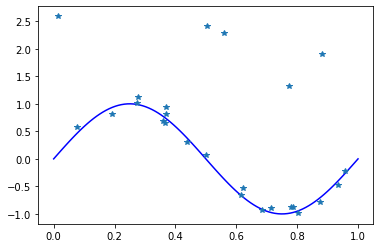

In [14]:
# This is the same data from the tutorial. Use these values. Use the same X as in problem 2. 

size = 25
bias = 2.5
rng = np.random.RandomState(1234)
x = rng.uniform(0., 1., size)
y = func(x) + rng.normal(scale=0.1, size=size)
# Add outlier bias
y[15:20] = y[15:20] + bias
xt = np.linspace(0., 1., 100)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')

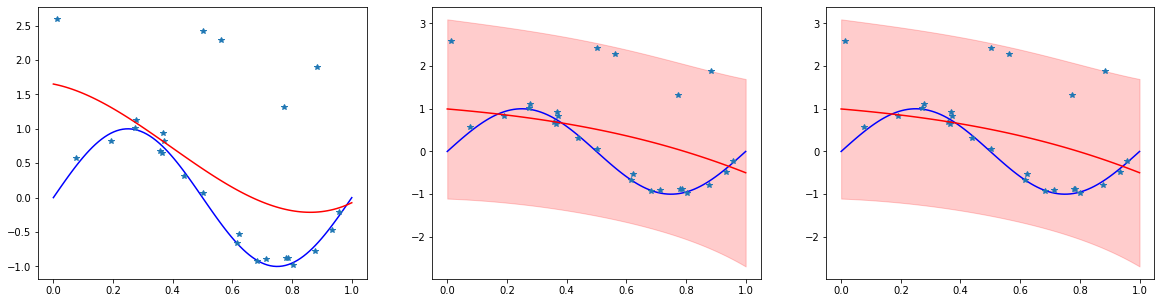

In [15]:
# Problem 4.1: Repeat all the steps from problem 2 and 3 but this time using 'y2' (data with outliers defined in tutorial)

# YOUR CODE HERE

# Getting the same code from problem 2 and 3 - No need but just for easy readability
n_order = 3
X = PolynomialFeatures(n_order).fit_transform(x[:, np.newaxis])
Xt = PolynomialFeatures(n_order).fit_transform(xt[:, np.newaxis])

lreg = linear_model.LinearRegression()
coefficient1 = lreg.fit(X, y2).coef_

ypred1 = lreg.predict(Xt) # Do prediction with lreg model for "Xt"

breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
coefficient2 = breg.fit(X, y2).coef_

ypred2, ystd2 = breg.predict(Xt, return_std=True) # Do prediction with breg model for "Xt"

breg.set_params(alpha_init=1., lambda_init= 1e-3) 
coefficient3 = breg.fit(X, y2).coef_ 

ypred3, ystd3 = breg.predict(Xt, return_std=True) # Do prediction with the modified breg model for "Xt"

# Remember to plot all the results also
f = plt.figure(figsize=(20,5))

f.add_subplot(1,3,1)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(xt, ypred1, 'r')

f.add_subplot(1,3,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(xt, ypred2, 'r')
plt.fill_between(xt, ypred2 - 1.96 * ystd2, ypred2 + 1.96 * ystd2, color='red', alpha=0.2, label='95% CI')

f.add_subplot(1,3,3)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(xt, ypred3, 'r')
plt.fill_between(xt, ypred3 - 1.96 * ystd3, ypred3 + 1.96 * ystd3, color='red', alpha=0.2, label='95% CI')

In [16]:
# Your points for the Problem 4 predictions will be given in this cell. Do not modify it.

In [17]:
# Your points for the Problem 4 coefficient calculations will be given in this cell. Do not modify it.

####  4.2 Compare all the results from Problem 2, 3, and 4. Explain your reasoning why models behave differently?

Answer to 4.2 in the cell below


Linear regression seeks the optimal linear relationship between independent and dependent variables by minimizing the sum of squared differences. It assumes normally distributed noise with constant variance. In contrast, Bayesian linear regression is probabilistic, introducing prior distributions to consider parameter uncertainty. The BayesianRidge model in scikit-learn incorporates these principles, with alpha_init and lambda_init affecting prior hyperparameters. While linear regression is vulnerable to outliers, Bayesian linear regression is more robust but can still be impacted, especially with severe outliers. Adjusting alpha_init and lambda_init may enhance robustness, but careful consideration of hyperparameters and outlier nature is essential for optimal performance in both models.

## RANSAC

<a id='Task1.5'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 5

<p> Complete the code below to build and fit a RANSAC model for curve fitting on sinusoidal data with noise and bias</p>
<p>1) Fit RANSAC model with "X" and "y2"</p>
<p>2) Predict the points using fitted RANSAC model for "Xt"</p>
<p>3) Plot data points and obtained curve</p>

**Hint: Your output image should look like this**
<br>
<img src="images/Fig5.png" />
<br>
<p>4) Compare this results with Problem 4. Explain your reasoning why models behave differently?</p>

</div>

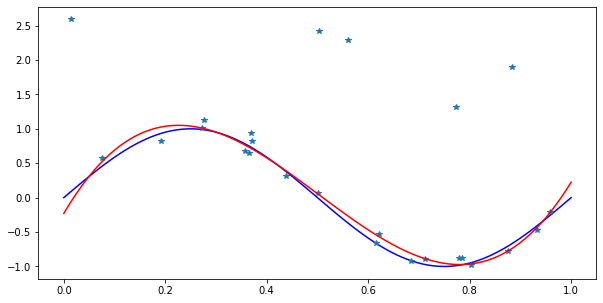

In [18]:
# Problem 5.1.

# YOUR CODE HERE

## == Create linear regression object using RANSACRegressor== #
np.random.seed(0) # Do not change
ransac = linear_model.RANSACRegressor().fit(X, y2)

# Problem 5.2.: Predict the points using fitted RANSAC model for "Xt"
ypred = ransac.predict(Xt)

# Remember to plot the results
f = plt.figure(figsize=(10,5))
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(xt, ypred, 'r')

In [19]:
# Your points for the Problem 5 will be given in this cell. Do not modify it.

#### 5.4 Compare this results with Problem 3. Explain your reasoning why models behave differently?

Answer to 5.4 in the cell below

RANSAC is an outlier-robust algorithm for linear regression. Unlike traditional linear regression, which is sensitive to outliers, RANSAC iteratively fits models to random data subsets, effectively ignoring outliers. While Bayesian Linear Regression provides increased robustness compared to linear regression, it may still be impacted by outliers, especially with severe cases. In contrast, RANSAC is designed for robustness, explicitly addressing outliers during the fitting process and prioritizing accurate estimation of the underlying relationship by focusing on inlier points.

## Gaussian Mixture Model

<a id='Task1.6'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 6

<p>Consider the data from file gmm_data.csv. 

1) Prepare scatter plot of the data where you plot the second column against the first column.

**Hint: Your output image should look like this**
<br>
<img src="images/Fig6.png" />
<br>

2) Perform K-means clustering with 4 clusters on data points: fit model to data and predict the cluster labels of data points. Prepare a scatter plot of data points with different colors indicating different cluster labels. 

**Hint: Your output image should look like this**
<br>
<img src="images/Fig7.png" />
<br>

3) Apply Gaussian Mixture Model with parameter covariance_type = 'full', random_state = 0 and with with 4 clusters; again fit model with data and predict cluster labels. Plot data points with different colors corresponding to cluster labels. Use GMM to predict also cluster labels' posterior probabilities. 

**Hint: Your output image should look like this**
<br>
<img src="images/Fig8.png" />
<br>

4) Compare K means and GMM; what is their principal difference? How their outputs differ here and what might be the reason for it? </p>

</div>

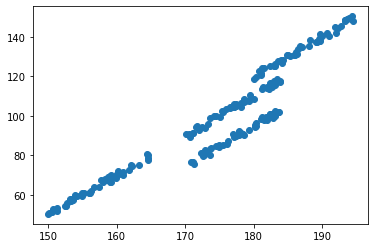

In [20]:
# Problem 6.1.: Load and plot the data in this cell
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# YOUR CODE HERE
data = pd.read_csv('data/gmm_data.csv', header=None)
plt.scatter(data[0], data[1])

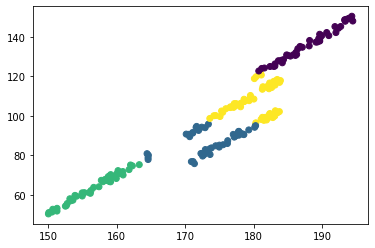

In [21]:
# Problem 6.2: K-means clustering

#DO NOT CHANGE THE SEED
np.random.seed(0)

#K-means clustering with 4 clusters
# YOUR CODE HERE
kmeans = KMeans(n_clusters=4, n_init=10).fit(data)
labels1 = kmeans.labels_
plt.scatter(data[0], data[1], c=labels1)

In [22]:
# Your points for the Problem 6 K-means labels will be given in this cell. Do not modify it.

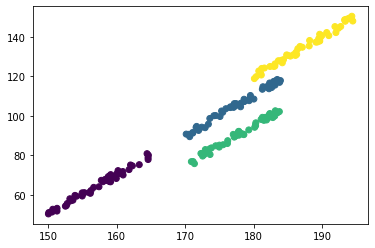

In [23]:
# Problem 6.3.: Gaussian Mixture Model

# YOUR CODE HERE
#GMM clustering with 4 clusters, random_state=0 and covariance_type="full"
gmm = GaussianMixture(n_components=4, random_state=100, covariance_type="full").fit(data)
labels2 = gmm.predict(data)
probs = gmm.predict_proba(data)

plt.scatter(data[0], data[1], c=labels2)

In [24]:
# Your points for the Problem 6 Gaussian Mixture labels will be given in this cell. Do not modify it.

In [25]:
# Your points for the Problem 6 Gaussian Mixture probabilities will be given in this cell. Do not modify it.

#### 6.4 Compare K means and GMM; what is their principal difference? How their outputs differ here and what might be the reason for it?

K-means assumes spherical clusters with equal variance and enforces a hard assignment of data points to clusters. In contrast, GMM allows clusters with different shapes and variances, employing a soft assignment that provides probabilities for each data point's cluster membership. In this example, when using K-means, the algorithm struggles to correctly cluster data where two sections are close together, often dividing them from the middle erroneously. This is because K-means assumes spherical clusters with equal variance and enforces a strict, non-overlapping assignment. On the other hand, Gaussian Mixture Model (GMM) successfully captures the nuanced relationships within the data by allowing for flexible cluster shapes and soft assignments, making it adept at handling scenarios where clusters are close or overlapping.